In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import matplotlib.pyplot as plt
from IPython.display import Image
import scanpy as sc
from cnmf import cNMF

if not os.path.exists('example_PBMC'):
    os.mkdir('example_PBMC')
    
np.random.seed(14)

In [4]:
adata = sc.read('melanoma_16k_counts_recon2.h5ad')
adata

AnnData object with n_obs × n_vars = 16291 × 1689

In [5]:
sc.pp.filter_cells(adata, min_genes=100) # filter cells with fewer than 100 genes
sc.pp.filter_cells(adata, min_counts=100)  # This is a weaker threshold than above. It is just to population the n_counts column in adata
sc.pp.filter_genes(adata, min_cells=3) # filter genes detected in fewer than 3 cells

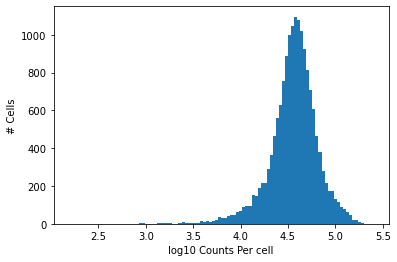

In [6]:
## plot log10 # counts per cell
plt.hist(np.log10(adata.obs['n_counts']), bins=100)
_ = plt.xlabel('log10 Counts Per cell')
_ = plt.ylabel('# Cells')

In [7]:
adata

AnnData object with n_obs × n_vars = 16240 × 1684
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

In [8]:
count_adat_fn = 'example_PBMC/counts.h5ad'
sc.write(count_adat_fn, adata)

In [9]:
## Commented out because it is slow

count_txt_fn = 'example_PBMC/counts.tsv'
#dense_data.to_csv(count_txt_fn, sep='\t')

In [10]:
numiter=20 # Number of NMF replicates. Set this to a larger value ~200 for real data. We set this to a relatively low value here for illustration at a faster speed
numhvgenes=2000 ## Number of over-dispersed genes to use for running the actual factorizations

## Results will be saved to [output_directory]/[run_name] which in this example is example_PBMC/cNMF/pbmc_cNMF
output_directory = 'example_PBMC/cNMF'
if not os.path.exists(output_directory):
    os.mkdir(output_directory)
run_name = 'pbmc_cNMF'

## Specify the Ks to use as a space separated list in this case "5 6 7 8 9 10"
K = ' '.join([str(i) for i in range(5,11)])

## To speed this up, you can run it for only K=7-8 with the option below
#K = ' '.join([str(i) for i in range(7,9)])


seed = 14 ## Specify a seed pseudorandom number generation for reproducibility

## Path to the filtered counts dataset we output previously
countfn = 'example_PBMC/counts.h5ad'

In [11]:
## Initialize the cnmf object that will be used to run analyses
cnmf_obj = cNMF(output_dir=output_directory, name=run_name)

In [12]:
## Prepare the data, I.e. subset to 2000 high-variance genes, and variance normalize
cnmf_obj.prepare(counts_fn=countfn, components=np.arange(5,11), n_iter=20, seed=14, num_highvar_genes=2000)

In [13]:
## Specify that the jobs are being distributed over a single worker (total_workers=1) and then launch that worker
cnmf_obj.factorize(worker_i=0, total_workers=4)

[Worker 0]. Starting task 0.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 32.
[Worker 0]. Starting task 36.
[Worker 0]. Starting task 40.
[Worker 0]. Starting task 44.
[Worker 0]. Starting task 48.
[Worker 0]. Starting task 52.
[Worker 0]. Starting task 56.
[Worker 0]. Starting task 60.
[Worker 0]. Starting task 64.
[Worker 0]. Starting task 68.
[Worker 0]. Starting task 72.
[Worker 0]. Starting task 76.
[Worker 0]. Starting task 80.
[Worker 0]. Starting task 84.
[Worker 0]. Starting task 88.
[Worker 0]. Starting task 92.
[Worker 0]. Starting task 96.
[Worker 0]. Starting task 100.
[Worker 0]. Starting task 104.
[Worker 0]. Starting task 108.
[Worker 0]. Starting task 112.
[Worker 0]. Starting task 116.


In [14]:
cnmf_obj.combine()

Combining factorizations for k=5.
Combining factorizations for k=6.
Combining factorizations for k=7.
Combining factorizations for k=8.
Combining factorizations for k=9.
Combining factorizations for k=10.


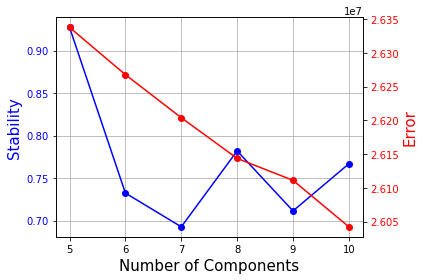

In [15]:
cnmf_obj.k_selection_plot(close_fig=False)

In [16]:
print('This saves the corresponding figure to the following file: %s' % cnmf_obj.paths['k_selection_plot'])

This saves the corresponding figure to the following file: example_PBMC/cNMF\pbmc_cNMF\pbmc_cNMF.k_selection.png


In [17]:
selected_K = 7
density_threshold = 2.00

In [18]:
adata

AnnData object with n_obs × n_vars = 16240 × 1684
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'